## Special Topics - Introduction to Deep Learning

#### Prof. Thomas da Silva Paula

### Convolutional neural network for image classification

* Using Keras
* Using Fashion Mnist

## Imports

In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.rcParams['figure.figsize'] = [15, 5]

## Loading the dataset

In [2]:
classes = ['t-shirt/top', 'trouser', 'pullover', 
           'dress', 'coat', 'sandal', 'shirt',
           'sneaker', 'bag', 'ankle boot']
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

### Exploring the dataset

In [3]:
print('[Train]', 'Images:', X_train.shape, X_train.dtype, '- Labels:', y_train.shape, y_train.dtype)
print('[Test]', 'Images:', X_test.shape, X_test.dtype, '- Labels:', y_test.shape, y_test.dtype)

[Train] Images: (60000, 28, 28) uint8 - Labels: (60000,) uint8
[Test] Images: (10000, 28, 28) uint8 - Labels: (10000,) uint8


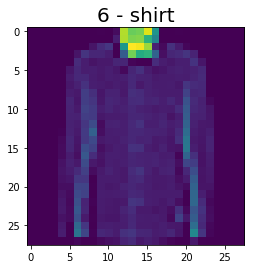

In [4]:
index = 33

class_id = y_train[index]
class_name = classes[class_id]
img = X_train[index]


plt.title(str(class_id) + ' - ' + class_name, fontsize=20)
plt.imshow(img)

### Preprocessing

In [5]:
print('Train:', X_train.mean(), X_train.max(), X_train.min())
print('Test:', X_test.mean(), X_test.max(), X_test.min())

Train: 72.94035223214286 255 0
Test: 73.14656658163265 255 0


### Images are now between 0 and 1

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
print('Train:', X_train.mean(), X_train.max(), X_train.min())
print('Test:', X_test.mean(), X_test.max(), X_test.min())

Train: 0.2860405969887955 1.0 0.0
Test: 0.2868492807122849 1.0 0.0


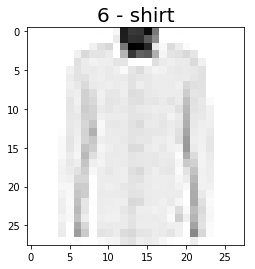

In [8]:
index = 33

class_id = y_train[index]
class_name = classes[class_id]
img = X_train[index]


plt.title(str(class_id) + ' - ' + class_name, fontsize=20)
plt.imshow(img, cmap=plt.cm.binary)

## Building our model

In [9]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [10]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [11]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### Sequential API

In [13]:
input_shape = X_train.shape[1:]

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu, input_shape=input_shape),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2),
    
    keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(128, (3, 3), padding='same', activation=tf.nn.relu),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2),
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
__________

In [16]:
model.load_weights('cnn_fashion.h5')

In [17]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

In [ ]:
# hist = model.fit(X_train, y_train,
#                  batch_size=32,
#                  epochs=20,
#                  validation_data=(X_test, y_test),
#                  verbose=1)

## Evaluating our model

In [18]:
%%time
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

CPU times: user 14.6 s, sys: 168 ms, total: 14.8 s
Wall time: 4.75 s


In [19]:
print(y_test_pred)

[9 2 1 ... 8 1 5]


In [20]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       1.00      0.98      0.99      1000
           2       0.71      0.95      0.81      1000
           3       0.93      0.86      0.90      1000
           4       0.90      0.75      0.82      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.71      0.74      1000
           7       0.97      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



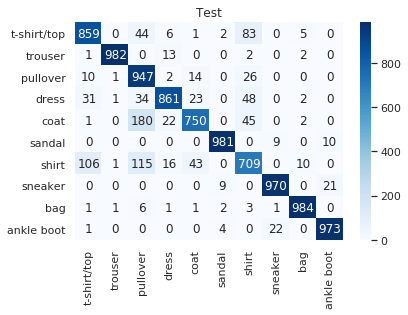

In [21]:
cm = confusion_matrix(y_test, y_test_pred)
sns.set()
plt.figure()
plt.title('Test')
sns.heatmap(cm, annot=True, yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='d')

## Testing our model

In [22]:
test_index = 99
test_img = X_test[test_index]
test_label = classes[y_test[test_index]]

preds = model.predict(np.expand_dims(test_img, axis=0))
print(preds)

[[7.0661862e-08 1.1562327e-15 9.9983859e-01 2.1263348e-10 1.0572430e-06
  5.4234556e-16 1.6036695e-04 1.3159379e-16 5.9208324e-12 6.5236909e-17]]


pullover


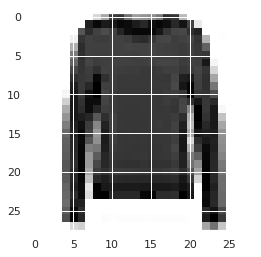

In [23]:
print(test_label)
plt.imshow(test_img.reshape(28, 28), cmap='binary')

<BarContainer object of 10 artists>

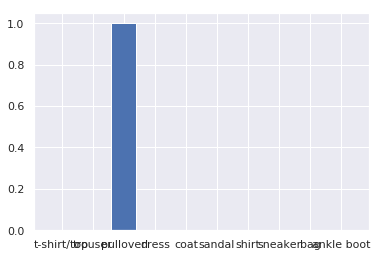

In [24]:
plt.bar(np.arange(0, len(preds[0])), preds[0], tick_label=classes)

## Testing our model with custom images

In [25]:
keras_img = keras.preprocessing.image

### Loading in the exact way the model expects
We need to make sure the size of the image, number of channels, and data format are all correct. We also need to do any preprocessing step that was made, such as dividing by 255.

In our case, we need to:
* Resize image to 28x28
* Convert it to grayscale
* Load it as uint8
* Normalize the pixels to be between 0 and 1

In [26]:
img = keras_img.load_img('../../sample_images/tshirt.png',
                         color_mode='grayscale',
                         target_size=(28, 28))

img = keras_img.img_to_array(img,
                             dtype='uint8')

print(img.shape, img.dtype)

(28, 28, 1) uint8


In [27]:
img = img / 255
print(img.max(), img.min())

0.4980392156862745 0.0


### We still need to remove that extra dimension and add the image in a batch of 1
The model expects the shape (batch, width, height, channel), so we need to preprocess our image accordingly.

In [28]:
print(img.shape)

(28, 28, 1)


In [29]:
img = np.expand_dims(img, axis=0)
print(img.shape)

(1, 28, 28, 1)


### Do the prediction

In [30]:
preds = model.predict(img)
print(preds)

[[8.9997351e-01 2.7044772e-10 6.6338296e-05 4.1934532e-06 1.4770615e-07
  5.4701830e-09 9.9950336e-02 2.0896906e-10 5.6175913e-06 6.8589481e-09]]


We need to specify the index 0 since we are receiving a list of 1 image

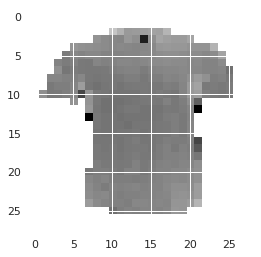

In [31]:
plt.imshow(img[0].reshape(28, 28), cmap='binary')

<BarContainer object of 10 artists>

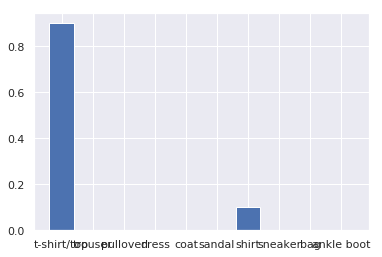

In [32]:
plt.bar(np.arange(0, len(preds[0])), preds[0], tick_label=classes)